In [1]:
import pandas as pd

In [2]:
import numpy as np

In [10]:
data = pd.read_csv("project_18_dataset_combined.csv")
data = data[['label', 'text']]

#set display option
pd.set_option('display.max_colwidth', None)

#make target labels boolean
data['label']=data['label'].apply(lambda x: 1 if x == 14 else 0)

print(data.shape)
print(data.label.value_counts())

(19821, 2)
0    18585
1     1236
Name: label, dtype: int64


In [11]:
#Balancing data
count_label_0, count_label_1 = data.label.value_counts()

data_label_1 = data[data['label'] == 1]
data_label_0 = data[data['label'] == 0]

data_label_0_b = data_label_0.sample(count_label_1, random_state=88)
data_b = pd.concat([data_label_0_b, data_label_1])
print(data_b.shape)
print(data_b.label.value_counts())

(2472, 2)
0    1236
1    1236
Name: label, dtype: int64


In [12]:
#lemmatizing
import spacy
nlp = spacy.load('en_core_web_sm')
data_b['text_lemmatized'] = data_b['text'].apply(lambda x: " ".join([words.lemma_ for words in nlp(x)]))

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([ ('vectorizer', TfidfVectorizer(lowercase=True, max_df=0.5, max_features=5000, min_df=1, ngram_range=(1, 3), smooth_idf=True, sublinear_tf=True, use_idf=False)), ('classifier', MultinomialNB(alpha=0.1, fit_prior=False)) ])
#Pipeline([ ('vectorizer', CountVectorizer(lowercase=True, max_df=0.5, max_features=7000, min_df=1, ngram_range=(1, 3))), ('classifier', MultinomialNB(alpha=0.4, fit_prior=False)) ])

model = pipeline.fit(data_b['text_lemmatized'], data_b['label'])

In [6]:
chunk = pd.read_csv('com_1to50.csv', chunksize=1000000)
com_1to50 = pd.concat(chunk)
com_1to50 = com_1to50[['com']]
print(com_1to50.shape)

(7359397, 1)


In [7]:
chunk = pd.read_csv('com_51to100.csv', chunksize=1000000)
com_51to100 = pd.concat(chunk)
com_51to100 = com_51to100[['com']]
print(com_51to100.shape)

(6495817, 1)


In [9]:
chunk = pd.read_csv('com_101to150.csv', chunksize=1000000)
com_101to150 = pd.concat(chunk)
com_101to150 = com_101to150[['com']]
print(com_101to150.shape)

(7345523, 1)


In [ ]:
chunk = pd.read_csv('com_151to200.csv', chunksize=1000000)
com_151to200 = pd.concat(chunk)
com_151to200 = com_151to200[['com']]
print(com_150to201.shape)

In [ ]:
chunk = pd.read_csv('com_201to250.csv', chunksize=1000000)
com_201to250 = pd.concat(chunk)
com_201to250 = com_201to250[['com']]
print(com_201to250.shape)

In [ ]:
chunk = pd.read_csv('com_251to300.csv', chunksize=1000000)
com_251to300 = pd.concat(chunk)
com_251to300 = com_251to300[['com']]
print(com_251to300.shape)

In [ ]:
chunk = pd.read_csv('com_301to350.csv', chunksize=1000000)
com_301to350 = pd.concat(chunk)
com_301to350 = com_301to350[['com']]
print(com_251to300.shape)

In [ ]:
chunk = pd.read_csv('com_351to400.csv', chunksize=1000000)
com_351to400 = pd.concat(chunk)
com_351to400 = com_351to400[['com']]
print(com_351to400.shape)

In [ ]:
chunk = pd.read_csv('com_401to459.csv', chunksize=1000000)
com_401to459 = pd.concat(chunk)
com_401to459 = com_401to459[['com']]
print(com_401to459.shape)

In [ ]:
chunk = pd.read_csv('com_460.csv', chunksize=1000000)
com_460 = pd.concat(chunk)
com_460 = com_460[['com']]
print(com_460.shape)

In [ ]:
len(com_1to50)+len(com_51to100)+len(com_101to150)+len(com_150to201)+len(com_201to250)+len(com_251to300)+len(com_301to350)+len(com_351to400)+len(com_401to459)+len(com_460)

In [ ]:
all_com = pd.concat([com_1to50, com_51to100, com_101to150, com_150to201, com_201to250, com_251to300, com_301to350, com_351to400, com_401to459, com_460])

In [23]:
y_pred = model.predict(all_com['com'].apply(lambda x: np.str_(x)))

In [26]:
print('# his_com:', np.count_nonzero(y_pred == 1))
print('# non-his_com:', np.count_nonzero(y_pred == 0))

# his_com: 2096185
# non-his_com: 5263213


In [27]:
y_pred_prob = model.predict_proba(all_com['com'].apply(lambda x: np.str_(x)))[:, 1]

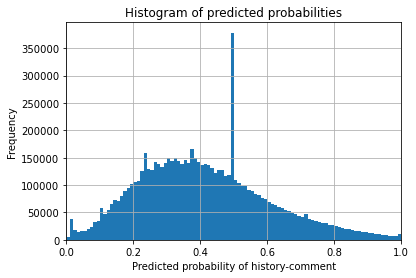

In [31]:
import matplotlib.pyplot as plt

plt.hist(y_pred_prob, bins=100)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability of history-comment')
plt.ylabel('Frequency')

plt.grid(True)

In [38]:
com_df = pd.DataFrame({'com':all_com['com'].apply(lambda x: np.str_(x)), 'class':y_pred, 'proba':y_pred_prob})

In [39]:
sorted_proba = com_df.sort_values('proba', ascending=False)

In [44]:
sorted_proba['characters'] = sorted_proba['com'].str.len()

sorted_proba['words'] = [len(x.split()) for x in sorted_proba['com'].tolist()]

In [45]:
print('average # of characters in pred comments:', sorted_proba.characters.mean())
print('average # of word in pred comments:', sorted_proba.words.mean())
print('-----')
print('average # of characters in pos pred comments:', sorted_proba.characters[sorted_proba['class'] == 1].mean())
print('average # of characters in neg pred comments:', sorted_proba.characters[sorted_proba['class'] == 0].mean())
print('-----')
print('average # of words in pos pred comments:', sorted_proba.words[sorted_proba['class'] == 1].mean())
print('average # of words in neg pred comments:', sorted_proba.words[sorted_proba['class'] == 0].mean())
print('-----')
print('average # of characters with pos pred_proba above 90%:', sorted_proba.characters[sorted_proba['proba'] >= 0.9].mean())
print('average # of characters with pos pred_proba below 90%:', sorted_proba.characters[sorted_proba['proba'] < 0.9].mean())
print('-----')
print('average # of words with pos pred_proba above 90%:', sorted_proba.words[sorted_proba['proba'] >= 0.9].mean())
print('average # of words with pos pred_proba below 90%:', sorted_proba.words[sorted_proba['proba'] < 0.9].mean())

average # of characters in pred comments: 129.97375804379652
average # of word in pred comments: 26.72724535349223
-----
average # of characters in pos pred comments: 168.95880945622642
average # of characters in neg pred comments: 114.44714340840851
-----
average # of words in pos pred comments: 34.00120933982449
average # of words in neg pred comments: 23.83023658742293
-----
average # of characters with pos pred_proba above 90%: 409.9425024742572
average # of characters with pos pred_proba below 90%: 126.31333210359533
-----
average # of words with pos pred_proba above 90%: 77.43040493587989
average # of words with pos pred_proba below 90%: 26.064331495150334


In [58]:
print('average # of characters with pred_proba at 50%:', sorted_proba.characters[sorted_proba['proba'] == 0.5].mean())
print('-----')
print('average # of words with pred_proba at 50%:', sorted_proba.words[sorted_proba['proba'] == 0.5].mean())

average # of characters with pred_proba at 50%: 17.75004687379369
-----
average # of words with pred_proba at 50%: 3.0268559265018915


In [56]:
print(sorted_proba.characters[(sorted_proba['proba'] >= 0.49) & (sorted_proba['proba'] <= 0.51)].mean())
print(sorted_proba.words[(sorted_proba['proba'] >= 0.49) & (sorted_proba['proba'] <= 0.51)].mean())

64.71088126640427
13.069743617062691


In [64]:
com_50prob = com_df.loc[(com_df['proba'] == 0.5)]
com_50prob

In [59]:
y_pred_th = (model.predict_proba(all_com['com'].apply(lambda x: np.str_(x)))[:, 1] >= 0.9).astype(bool)

In [60]:
print('# his_com with 90% thresholding:', np.count_nonzero(y_pred_th == 1))
print('# non-his_com with 90% thresholding:', np.count_nonzero(y_pred_th == 0))

# his_com with 90% thresholding: 94978
# non-his_com with 90% thresholding: 7264420


In [ ]:
print('# his_com with 90% thresholding:', np.count_nonzero(y_pred_th == 1))
print('# non-his_com with 90% thresholding:', np.count_nonzero(y_pred_th == 0))

In [ ]:
his_com90 = com_df.loc[(com_df['proba'] >= 0.9)]

In [ ]:
his_com90.to_csv('his_com.csv')

In [ ]:
his_com75 = com_df.loc[(com_df['proba'] >= 0.75)]

In [ ]:
his_com75.to_csv('his_com.csv')